Question 1 : What is Information Gain, and how is it used in Decision Trees?
- Information Gain is a key concept from information theory used in Decision Trees to determine which feature (attribute) to split on at each step in the tree-building process. It's a measure of how well a feature separates or classifies the data.
- Information Gain (IG) measures the reduction in entropy (uncertainty or impurity) after a dataset is split on an attribute.
- Entropy (H) is a measure of disorder or impurity in the dataset.
- how its used in decision trees:
- 1)At each node in the tree, the algorithm evaluates all possible features.
- 2)For each feature, it calculates the Information Gain from splitting on that feature.
- 3)It chooses the feature with the highest Information Gain to split the node.
- 4)This process is repeated recursively to build the tree.

Question 2: What is the difference between Gini Impurity and Entropy?
- Gini Impurity and Entropy are metrics used to evaluate the quality of a split in decision tree algorithms. Both aim to measure the “impurity” or “disorder” of a dataset.
- Gini Impurity: Measures the probability of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the dataset.
- Entropy: Measures the amount of information (or uncertainty) in the data. The higher the entropy, the more mixed (impure) the classes are.
- Behavior: Both are zero when the node is pure, i.e., contains samples of a single class.
- Entropy penalizes impurity more heavily than Gini, especially when class probabilities are closer to 0.5.
- Gini is less computationally expensive, as it doesn't involve logarithmic operations.
- Practical Impact: In practice, Gini and Entropy often lead to similar trees, though not always identical.
- Gini tends to create splits that isolate the most frequent class, while Entropy tends to produce more balanced splits in terms of class distribution.
- CART (Classification and Regression Trees) uses Gini by default.
- ID3 and C4.5 use Entropy (Information Gain).
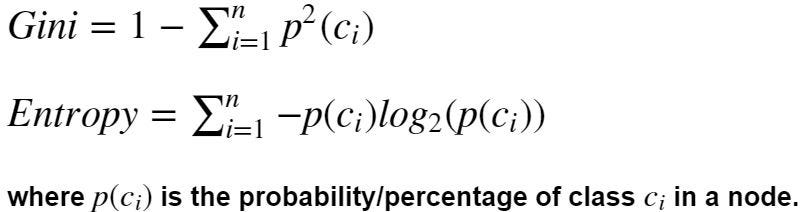

Question 3:What is Pre-Pruning in Decision Trees?
- Pre-pruning (also known as early stopping) is a technique used in decision tree algorithms to stop the tree from growing once a certain condition is met, before it becomes too complex. The main goal of pre-pruning is to prevent overfitting by limiting the size or depth of the tree during its construction.
- Normally, a decision tree continues to split the dataset until:
- All leaf nodes are pure (i.e., contain instances from only one class), or
- There are no more features left to split.
- This can lead to very large trees, which may perfectly fit the training data but perform poorly on new, unseen data — that's overfitting.
- Pre-Pruning: How It Works
- Pre-pruning halts the tree growth early by using criteria such as:
- Maximum tree depth: e.g., stop if depth reaches 10.
- Minimum number of samples at a node: e.g., don’t split if a node has fewer than 5 samples.
- Minimum information gain or Gini reduction: e.g., only split if the improvement is above a threshold.
- Maximum number of leaf nodes: limits overall complexity.
- These rules are set before training and checked during the tree-building process.

In [1]:
#Question 4:Write a Python program to train a Decision Tree Classifier using Gini
#Impurity as the criterion and print the feature importances (practical).


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create a Decision Tree Classifier with Gini criterion
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)  # Train the model


importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the result
print("Feature Importances using Gini Impurity:")
print(importance_df)


Feature Importances using Gini Impurity:
             Feature  Importance
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000


Question 5: What is a Support Vector Machine (SVM)?
- A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks, although it's more commonly used for classification.
- SVM tries to find the best boundary (hyperplane) that separates data points of different classes with the maximum margin — that is, the largest possible distance between the data points of each class and the boundary.
- Hyperplane:In 2D: it's a line. In 3D: it's a plane. In higher dimensions: it's called a hyperplane.
- SVM finds the hyperplane that best separates the classes.
- Support Vectors: These are the data points closest to the hyperplane. They are "critical" to defining the hyperplane, hence the name Support Vector.
- Margin: The distance between the hyperplane and the nearest support vectors from either class.
SVM maximizes this margin to improve generalization.
- Linear vs. Non-linear SVM: Linear SVM: When the data is linearly separable (i.e., can be separated by a straight line).
Non-linear SVM: Uses the kernel trick to map data into a higher-dimensional space where it becomes linearly separable.
- Common Kernels: Linear: For linearly separable data; Polynomial; RBF (Radial Basis Function) / Gaussian; Sigmoid

Question 6: What is the Kernel Trick in SVM?
- The Kernel Trick in Support Vector Machines (SVM) is a powerful technique that allows SVMs to perform non-linear classification by implicitly mapping data into a higher-dimensional space without explicitly computing the coordinates of the data in that space.
- SVMs work well when data is linearly separable. But what if it's not?
We can transform the input features into a higher-dimensional space where the data is linearly separable.
- But computing this transformation (called a feature map φ(x)) explicitly can be computationally expensive or infeasible.
- Enter the Kernel Trick.
- This saves a lot of computation and allows SVMs to learn complex, non-linear decision boundaries.
- The Kernel Trick lets SVMs learn non-linear patterns by computing dot products in high-dimensional spaces implicitly.
- This allows for powerful models without the computational cost of explicit feature transformations.

In [3]:
#Question 7: Write a Python program to train two SVM classifiers with Linear and RBF
#kernels on the Wine dataset, then compare their accuracies.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)


print("SVM with Linear Kernel Accuracy: {:.2f}%".format(accuracy_linear * 100))
print("SVM with RBF Kernel Accuracy: {:.2f}%".format(accuracy_rbf * 100))


if accuracy_linear > accuracy_rbf:
    print(" Linear kernel performed better.")
elif accuracy_rbf > accuracy_linear:
    print("RBF kernel performed better.")
else:
    print("Both kernels performed equally.")



SVM with Linear Kernel Accuracy: 96.30%
SVM with RBF Kernel Accuracy: 98.15%
RBF kernel performed better.


Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?
- The Naïve Bayes classifier is a family of probabilistic machine learning algorithms based on Bayes’ Theorem, primarily used for classification tasks. It's known for being simple, fast, and effective, especially for text classification, such as spam detection, sentiment analysis, and document categorization.
- Bayes' Theorem describes the probability of a hypothesis given some evidence:

P(H∣E)=P(E∣H)⋅P(H)/P(E)

- How the Naïve Bayes Classifier Works: Given a set of features (e.g., words in an email), Naïve Bayes calculates the probability of each class and assigns the class with the highest probability.
- Why is it Called “Naïve”?: It’s called "Naïve" because it naively assumes that all features are independent of each other given the class.
- This is rarely true in real-world data (features often depend on each other), but the classifier still works surprisingly well in practice, especially when the dependencies don’t strongly affect the class probabilities.

Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes
- 1)Guassian Naïve Bayes: Best for continuous features that are normally distributed.Common in datasets with numerical input like Iris dataset or sensor data.
- Assumption: The features follow a Gaussian (normal) distribution.
- Example: Features: height, weight, temperature, etc
- When not to use: Categorical or binary data, or features with skewed/non-Gaussian distributions.
- 2)Multinomial Naïve Bayes: Ideal for discrete count data.Most commonly used in text classification tasks (e.g., spam detection, sentiment analysis) where features represent word counts or term frequencies.
- Assumption: Features represent the number of times an event occurs, i.e., counts drawn from a multinomial distribution.
- Example: Features: [‘email’, ‘offer’, ‘free’] = [3, 0, 2] (word counts in a document)
- When not to use: Continuous numerical features.
- 3)Bernoulli Naïve Bayes: Designed for binary/boolean features (i.e., 0 or 1).
Also used in text classification, but with binary indicators (word present or not).
- Assumption: Features follow a Bernoulli distribution:
- Example: Features: [‘email’, ‘offer’, ‘free’] = [1, 0, 1] (word presence in a document)
- When not to use: Count or continuous data.

In [4]:
#Question 10: Breast Cancer Dataset
#Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer
#dataset and evaluate accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naïve Bayes classifier: {accuracy * 100:.2f}%")


Accuracy of Gaussian Naïve Bayes classifier: 97.37%
